# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [1]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

## a)
Read in the data and plot the values

In [3]:
from numpy import loadtxt
from pylab import plot, show, xlabel, ylabel

#file name and axis label, change based upon file in use
fileName = "millikan.txt"
xLabel = "Frequency (hz)"
yLabel = "Voltage (V)"

#data type of the file, change based upon file in use
fileDataType = float

#load the values from the given file to a variable using the given data type
data = loadtxt (fileName, fileDataType)

#assuming a text file of two columns and unknown number of rows, initializes first column as x-value and second as y-values
xValues = data[:, 0]
yValues = data[:, 1]


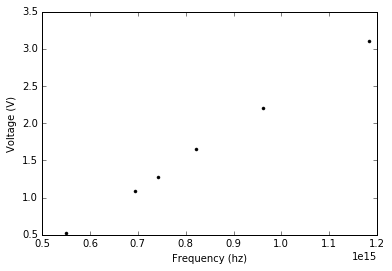

In [4]:
#plot the data
plot (xValues, yValues, "k.")
xlabel (xLabel)
ylabel (yLabel)

show ()

This data appears to be linear, although there are not many data points to tell a lot about the data.

## b)
Calculate Ex, Ey, Exx, and Exy  
From them print out the slope and intercept of best fit

In [9]:
from math import fsum

#returns the slope of a least square's solution given E-values as defined below
def getBestFitSlope (Ex, Ey, Exx, Exy):
    return (Exy - Ex * Ey) / (Exx - Ex**2)

#returns the intercept of a least square's solution given E-values as defined below
def getBestFitIntercept (Ex, Ey, Exx, Exy):
    return (Exx * Ey - Ex * Exy) / (Exx - Ex**2)

def getEx (N, xValues):
    return (1 / N) * fsum (xValues)

def getEy (N, yValues):
    return (1 / N) * fsum (yValues)

def getExx (N, xValues):
    return (1 / N) * fsum (xValues**2)

def getExy (N, xValues, yValues):
    return (1 / N) * fsum (xValues * yValues)

N = len (data)
Ex = getEx (N, xValues)
Ey = getEy (N, yValues)
Exx = getExx (N, xValues)
Exy = getExy (N, xValues, yValues)

slope = getBestFitSlope (Ex, Ey, Exx, Exy)
intercept = getBestFitIntercept (Ex, Ey, Exx, Exy)

print ("Slope", slope)
print ("Intercept", intercept)

Slope 4.088227358517502e-15
Intercept -1.73123580398135


These values seem to be correct, as I checked them with xcel's linear fit function.

## c)
Calculate mx + c for each x-value and for the given slope and intercept values, and store these values in an array.  
Then graph the array as a solid line on the original plot.

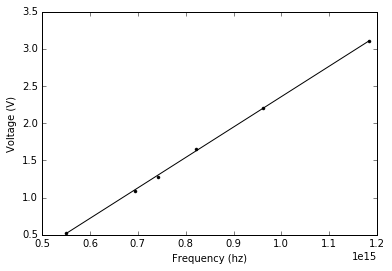

In [6]:
#returns the variation from a given x-value based upone a function's slope and intercept
def getXVariation (slope, intercept, xValue):
    return slope * xValue + intercept

#initialize list for xVariation
xVariation = []

#fill list for xVariation
for x in xValues:
    xVariation.append (getXVariation (slope, intercept, x))

#labels plot axes
xlabel (xLabel)
ylabel (yLabel)

#plots the data values on same graph as xVariation values
plot (xValues, xVariation, "k-")
plot (xValues, yValues, "k.")

show ()

Actually fitting the data with the calculated slope helps to show how well the calculated values seem to fit the data. All of the points appear to be very close to the line.

## d)
Calculate Plank's constant based upon the data'

In [7]:
CHARGE_OF_ELECTRON = 1.602e-19
PLANKS_CONSTANT = 6.62607004e-34

planksConstant = []

#adds all the Plank's constant values based upon the data values
for n in range(N):
    planksConstant.append (((yValues[n] - intercept) / xValues[n]) * CHARGE_OF_ELECTRON)

#calculates the average of all the Plank's constant values
planksConstantAvg = sum (planksConstant) / N

print ("h based upon data:", planksConstantAvg)
print ("% error:", abs (PLANKS_CONSTANT - planksConstantAvg) / PLANKS_CONSTANT * 100, "%")

h based upon data: 6.55007010185e-34
% error: 1.1469836222 %


In [8]:
#calculates Plank's constant based upon the slope value
planksConstant = slope * CHARGE_OF_ELECTRON

print ("h based upon data:", planksConstant)
print ("% error:", abs (PLANKS_CONSTANT - planksConstant) / PLANKS_CONSTANT * 100, "%")

h based upon data: 6.549340228345038e-34
% error: 1.1579988015786504 %


In calculating Plank's constant I was assuming the equation V = (h / e) * v - o, where 'v' was our x-values, 'V' was our y-values, 'o' was our intercept, and 'h / e' would be our slope. This means, given the known value for 'e' we could calculate a value for 'h': (h / e) = slope.

## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

#### Using polynomials

##### b)
Calculating the slope and intercept values using np functions

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fit_poly, cov_poly = np.polyfit (xValues, yValues, 1, cov=True)

slope_poly = fit_poly[0]
intercept_poly = fit_poly[1]

print ("Slope:", slope_poly)
print ("Intercept:", intercept_poly)

Slope: 4.08822735852e-15
Intercept: -1.73123580398


##### c)
Calculate variation values and print them on a line with the original data

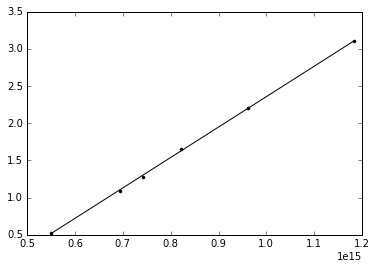

In [14]:
#initialize list for xVariation
xVariation_poly = []

#fill list for xVariation
for x in xValues:
    xVariation_poly.append (getXVariation (slope_poly, intercept_poly, x))

plt.plot (xValues, yValues, "k.")
plt.plot (xValues, xVariation_poly, "k-")
plt.show ()

#### Using Linear Regression

##### b)

In [18]:
from scipy.stats import linregress

fit_linear_regression = linregress (xValues, yValues)

slope_linreg = fit_linear_regression[0]
intercept_linreg = fit_linear_regression[1]

print ("Slope:", slope_linreg)
print ("Intercept:", intercept_linreg)

Slope: 4.08822735852e-15
Intercept: -1.73123580398


##### c)

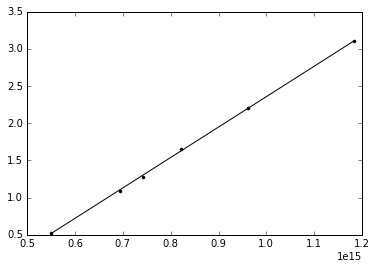

In [20]:
#initialize list for xVariation
xVariation_linreg = []

#fill list for xVariation
for x in xValues:
    xVariation_linreg.append (getXVariation (slope_linreg, intercept_linreg, x))

plt.plot (xValues, yValues, "k.")
plt.plot (xValues, xVariation_linreg, "k-")
plt.show ()

#### Curve Fit

##### b)

In [23]:
from scipy.optimize import curve_fit

def millikanFunc (x, slope, intercept):
    return slope * x + intercept

params_curve, cov_curve = curve_fit (millikanFunc, xValues, yValues)

slope_curve = params_curve[0]
intercept_curve = params_curve[1]

print ("Slope:", slope_curve)
print ("Intercept", intercept_curve)

Slope: 4.08822735807e-15
Intercept -1.73123580361


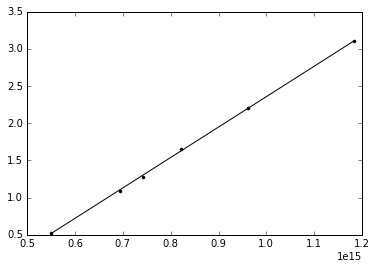

In [24]:
#initialize list for xVariation
xVariation_curve = []

#fill list for xVariation
for x in xValues:
    xVariation_curve.append (getXVariation (slope_curve, intercept_curve, x))

plt.plot (xValues, yValues, "k.")
plt.plot (xValues, xVariation_curve, "k-")
plt.show ()

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

In [25]:
# function given to us

# function to calculate the position and velocity for contant acceleration motion
# inputs: time, acceleration, initial vel, initial pos
# outputs: position, velocity
def position(t, a, v_i=0, x_i=0):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

#### 1)


In [51]:

timeValues = np.linspace (0, 20, 100)
xValues, velocityValues = position (timeValues, -9.8, 100, 100)

##### 2)

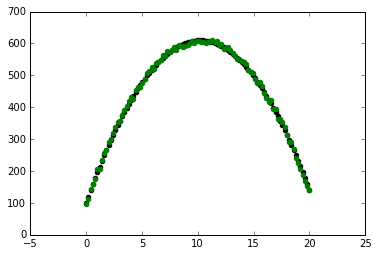

In [52]:
import random

randomVariation = 10
xValues_noise = []

for x in xValues:
    xValues_noise.append (x + random.uniform (-randomVariation, randomVariation))

plt.scatter (timeValues, xValues, color="black")
plt.scatter (timeValues, xValues_noise, color="green")

plt.show ()

## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2